In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F


In [90]:
# Get Data Ready in X, y (SETUP)

dataset = pd.read_csv('ReplicateUCT/CSV/state_mask_action_setup.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)#.reshape(-1, 1)
num_classes = 126  # Total number of classes
y_one_hot = F.one_hot(y, num_classes=num_classes)


# Create dataset and dataloader
dataset = TensorDataset(X, y)
# loader = DataLoader(dataset, batch_size=256, shuffle=True)

from torch.utils.data import random_split

dataset = TensorDataset(X, y)
train_size = int(0.95 * len(dataset))  # 80% of the dataset for training
test_size = len(dataset) - train_size  # The rest for testing

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [2]:
# Setup

class SetupNeuralNet(nn.Module):
    def __init__(self):
        super(SetupNeuralNet, self).__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(2223, 128),  # Reduced layer size
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 126)
        )

    def forward(self, x):
        logits = self.linear_stack(x)
        return logits


# model = NeuralNet()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), weight_decay=1e-4)

In [6]:
# Get Data Ready in X, y (NonSetup)

dataset = pd.read_csv('ReplicateUCT/CSV/state_mask_action_non_setup.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)#.reshape(-1, 1)
num_classes = 486  # Total number of classes
y_one_hot = F.one_hot(y, num_classes=num_classes)


# Create dataset and dataloader
dataset = TensorDataset(X, y)
# loader = DataLoader(dataset, batch_size=128, shuffle=True)

from torch.utils.data import random_split

dataset = TensorDataset(X, y)
train_size = int(0.9 * len(dataset))  # 80% of the dataset for training
test_size = len(dataset) - train_size  # The rest for testing

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=True)

In [9]:
# Full with action mask inputted structure (NON SETUP)

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(2223, 256),  # Reduced layer size
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 486)  # Adjusted to match the output size
        )

    def forward(self, x):
        logits = self.linear_stack(x)
        return logits

# model = NeuralNet()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters())

In [12]:
# Simple Training loop
for epoch in range(5000):  # number of epochs
    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 1, Loss: 4.777646064758301
Epoch 2, Loss: 4.478573322296143
Epoch 3, Loss: 3.6701714992523193
Epoch 4, Loss: 2.9701480865478516
Epoch 5, Loss: 2.706892251968384
Epoch 6, Loss: 2.5881943702697754
Epoch 7, Loss: 2.0677661895751953
Epoch 8, Loss: 1.6643954515457153
Epoch 9, Loss: 1.66592276096344
Epoch 10, Loss: 1.308529019355774
Epoch 11, Loss: 1.7139701843261719
Epoch 12, Loss: 1.072956919670105
Epoch 13, Loss: 0.8980652689933777
Epoch 14, Loss: 0.8188683986663818
Epoch 15, Loss: 1.2325892448425293
Epoch 16, Loss: 1.1985888481140137
Epoch 17, Loss: 1.0252530574798584
Epoch 18, Loss: 0.8023329973220825
Epoch 19, Loss: 1.015613317489624
Epoch 20, Loss: 0.7079194188117981
Epoch 21, Loss: 0.80033278465271
Epoch 22, Loss: 0.6804371476173401
Epoch 23, Loss: 0.5370250940322876
Epoch 24, Loss: 0.3763788640499115
Epoch 25, Loss: 0.6713101267814636
Epoch 26, Loss: 0.43327754735946655
Epoch 27, Loss: 0.819715678691864
Epoch 28, Loss: 0.5286624431610107
Epoch 29, Loss: 0.6736124753952026
Epoc

[E thread_pool.cpp:110] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:110] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:110] Exception in thread pool task: mutex lock failed: Invalid argument


KeyboardInterrupt: 

Epoch 1, Train Loss: 4.661640092730522, Test Loss: 3.994800329208374
Epoch 2, Train Loss: 3.787213444709778, Test Loss: 3.382478713989258
Epoch 3, Train Loss: 3.3430152783791223, Test Loss: 3.101372176950628
Epoch 4, Train Loss: 3.143097959458828, Test Loss: 2.9590973420576616
Epoch 5, Train Loss: 3.0149191493789353, Test Loss: 2.8550057844682173
Epoch 6, Train Loss: 2.9151757483681044, Test Loss: 2.7869047901847144
Epoch 7, Train Loss: 2.841112367808819, Test Loss: 2.7184920094229956
Epoch 8, Train Loss: 2.7818076511224112, Test Loss: 2.6661437208002265
Epoch 9, Train Loss: 2.7201406185825667, Test Loss: 2.614725936542858
Epoch 10, Train Loss: 2.6751658767461777, Test Loss: 2.580572149970315
Epoch 11, Train Loss: 2.6294173300266266, Test Loss: 2.54795503616333
Epoch 12, Train Loss: 2.5917206034064293, Test Loss: 2.4998753287575464
Epoch 13, Train Loss: 2.550466649234295, Test Loss: 2.485251405022361
Epoch 14, Train Loss: 2.5110280315081277, Test Loss: 2.4555685086683794
Epoch 15, Trai

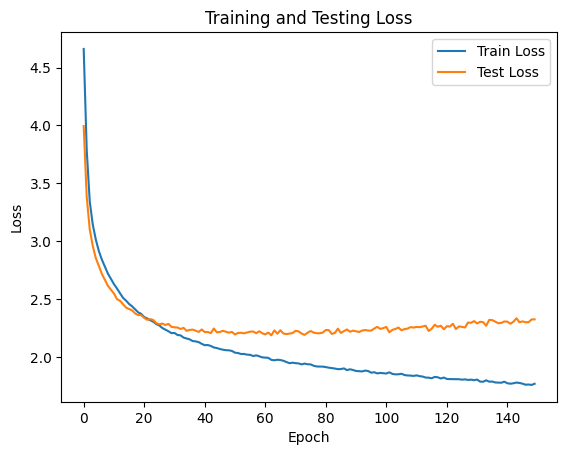

In [8]:
# Train/Test training loop
import matplotlib.pyplot as plt

train_losses = []
test_losses = []

best_test_loss = float('inf')

for epoch in range(150):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    test_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()

    train_loss /= len(train_loader)
    test_loss /= len(test_loader)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1}, Train Loss: {train_loss}, Test Loss: {test_loss}')

    # if test_loss < best_test_loss:
    #     best_test_loss = test_loss
    #     torch.save(model.state_dict(), 'ReplicateUCT/Models/Non_Setup.pth')

# Plotting the training and testing losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

In [53]:
torch.save(model.state_dict(), 'ReplicateUCT/full_state_actionMask.pth')

In [12]:
"""
Running Agent simulations
"""
from Agents.AgentRandom2 import AgentRandom2
from Agents.AgentMCTS import AgentMCTS
from Agents.AgentUCT import AgentUCT
from Agents.AgentNoMoves import AgentNoMoves
from Agents.AgentModel import AgentMultiModel, AgentModel
from Agents.AgentCopyUCT import AgentMultiCopyUCT, AgentCopyUCT
from Game.CatanGame import *
from CatanSimulator import CreateGame
from DeepLearning.PPO import MaskablePPO
from Game.CatanPlayer import PlayerStatsTracker
from tabulate import tabulate
from DeepLearning.Stats import headers
import dill as pickle
import pandas as pd
from CatanData.GameStateViewer import SaveGameStateImage, DisplayImage
import time
import math
from DeepLearning.GetObservation import getObservationSimplified


winner = [0,0,0,0]
player0Stats = PlayerStatsTracker()
Player0LosingStats = PlayerStatsTracker()
player1Stats = PlayerStatsTracker()

model = NeuralNet()
setupModel = SetupNeuralNet()
model.load_state_dict(torch.load('ReplicateUCT/Models/Non_Setup.pth'))
model.eval()
setupModel.load_state_dict(torch.load('ReplicateUCT/Models/Setup.pth'))

players = [ AgentMultiCopyUCT("P0", 0, setupModel=setupModel, model=model),
            AgentRandom2("P1", 1),
            AgentRandom2("P2", 2),
            AgentRandom2("P3", 3),]

COLLECT_STATS = True

NUM_GAMES = 100

numWrongActions = 0
numChoices = 0
for episode in range(NUM_GAMES):
    game = CreateGame(players)
    game = pickle.loads(pickle.dumps(game, -1))
    while True:
        currPlayer = game.gameState.players[game.gameState.currPlayer]

        agentAction = currPlayer.DoMove(game)
        agentAction.ApplyAction(game.gameState)

        # if currPlayer.seatNumber == 0: # and agentAction.type == 'EndTurn':
        #     DisplayImage(game.gameState, agentAction)
        #     time.sleep(1)

        if game.gameState.currState == "OVER":
            # print(f"\nNumDisallowedActions: {game.gameState.players[0].numWrongActions}")
            numWrongActions += game.gameState.players[0].numWrongActions
            numChoices += game.gameState.players[0].numChoices
            break
   
    winner[game.gameState.winner] += 1
    lost = game.gameState.winner != 0

    # Stats
    if COLLECT_STATS:
        game.gameState.players[0].generatePlayerStats()
        game.gameState.players[1].generatePlayerStats()

        player0Stats += game.gameState.players[0].stats
        player1Stats += game.gameState.players[1].stats
        if lost:
            Player0LosingStats += game.gameState.players[0].stats

# Collect stats
if COLLECT_STATS:
    player0Stats.getAverages()
    Player0LosingStats.getAverages()
    player1Stats.getAverages()
    player0Data = player0Stats.getList()
    player0LosingData = Player0LosingStats.getList()
    player1Data = player1Stats.getList()

    p_hat0 = winner[0] / sum(winner)
    p_hat1 = winner[1] / sum(winner)
    margin_error0 = round(100*(1.96 * math.sqrt((p_hat0 * (1 - p_hat0)) / sum(winner))), 2)
    margin_error1 = round(100*(1.96 * math.sqrt((p_hat1 * (1 - p_hat1)) / sum(winner))), 2)
    player0Data.insert(0, margin_error0)
    player0LosingData.insert(0, -1)
    player1Data.insert(0, margin_error1)
    player0Data.insert(0, winner[0]/sum(winner))
    player0LosingData.insert(0, -1)
    player1Data.insert(0, winner[1]/sum(winner))
    player0Data.insert(0, "Player0")
    player0LosingData.insert(0, "Player0LossesStats")
    player1Data.insert(0, "Player1")

    table = tabulate([player0Data, player0LosingData, player1Data], headers=headers, tablefmt='simple')
    print(table)

print(f"\nAvgWrongActions: {numWrongActions/NUM_GAMES}, NumChoices: {numChoices/NUM_GAMES}")
print("\n\nWinnings: ", winner)

AgentName             WinRate    MarginError    numTurns    victoryPoints    numRoadsBuilt    devCardsBought  usedDevCards                         settlementsBuilt    citiesBuilt    devCardVP    largestArmy    longestRoad  resourcesReceived                           totalResourcesReceivedPerTurn    totalResourcesDiscarded    totalResourcesStolen  resourcesFromDevCard                  totalResourcesFromDevCard  resourcesFromBankTrade                  totalResourcesFromBankTrade  finalResourceProduction              finalTradeRates                                                                                  setupResourceProduction               totalSetupResourceProduction  setupTradeRates                   setupResourceDiversity    turnsForFirstSettlement    noSettlementsBuilt    turnsForFirstCity    noCitysBuilt
------------------  ---------  -------------  ----------  ---------------  ---------------  ----------------  ---------------------------------  ------------------  -------